In [42]:
# @title
from IPython.display import display, HTML

display(HTML('''
<div style="display: flex; justify-content: center; align-items: center; text-align: center;">
    <img alt="udeA logo" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" style="width: 107px; height: 152px; margin-right: 20px;">
    <div>
        <h2 style="font-size: 28px;"><strong>Proyecto 2 : Análisis de señales ECG</strong></h2>
        <p>Sergio Daza Vasquez - 1010082612</p>
        <p>Natalia Arenas Pachón - 1007729698</p>
        <p>Daniel Barrera Mazo - 1045439175</p>
    </div>
</div>
'''))

## **1. Para cada artículo hacer un diagrama de flujo de las metodologías usadas en los artículos**

* Explicar en sus palabras las metodologías desarrolladas

### **Artículo 1:** Predicción de fibrilación auricular a partir de señales de ECG de una sola derivación en el hogar sin arritmias

  **Metodología:**

**1. Información general de recopilación de datos**

  Este modelo permite estimar el riesgo de un individuo de desarrollar fibrilación auricular o aleteo auricular (agrupados en una categoría singular FA) en un plazo de dos semanas de observación.

  Este modelo toma un intervalo de la señal de ECG de una sola derivación como entrada, con una longitud entre 10 min y 24 h, que no contenga ninguna instancia de FA.

  Se analizaron 459.889 registros de ECG de una sola derivación (derivación II modificada) obtenidos mediante un parche ambulatorio que monitorizó a los participantes durante hasta 14 días. Los registros se recogieron en intervalos sin episodios de FA para desarrollar el modelo predictivo.

**2. Extracción de características**

  Se extraen 128 características representativas predictivas de futuros eventos de FA a partir de un periodo de ECG de 10 minutos sin FA.
  * Características demográficas: Se consideraron variables como la edad y el género.
  * Características del ritmo cardíaco: Se evaluaron métricas de variabilidad de la frecuencia cardíaca (HRV) y la presencia de latidos ectópicos, como contracciones auriculares prematuras.
  * Características morfológicas: Un módulo de aprendizaje profundo extrajo automáticamente características representativas de la morfología del ECG.

**3. Configuración de entradas**

  Tiene diferentes entradas adaptables a diferentes escenarios y su salida es siempre el riesgo a presentar FA:

  * Modelo AG (entradas de edad y género)
  * Modelo AG + HRV (característica demográficas y de variabilidad de la frecuencia cardiaca)
  * Modelo DL only (características extraídas automáticamente mediante aprendizaje profundo)
  * Modelo AG + HRV + Ectopic + Rhythm (características extraídas manualmente excluyendo características de aprendizaje profundo)
  * Modelo all features (todas las características, incluyendo las de aprendizaje profundo)

**4. Limpieza y normalización**

  Antes de entrenar el modelo, se realizó un proceso de limpieza y normalización de los datos, dado que las características de aprendizaje profundo tienen diferentes escalas, rangos y distribuciones. Se realizó en tres partes:

  * Normalización de datos o transformación exponencial
  * Eliminación de offset
  * Escalado

**5. Modelo de predicción**

  Este proceso se desarrolló en dos etapas:

  * La primera se basó en la extracción de conjuntos de características de 10 minutos de datos de ECG, centrándose en características locales.
  * En la segunda etapa se utilizan las características extraídas como entradas para un segundo módulo de aprendizaje profundo para estimar el riesgo de futuros eventos de FA, utilizando las relaciones temporales de las señales multidimensionales a mayor escala.

**6. Características de aprendizaje**

  Debido a que las redes neuronales recurrentes limitan el número de ventanas cortas por su dificultad para procesar secuencias multidimensionales largas, es esencial identificar un tamaño que aporte la información necesaria para el modelo sin que exceda el tamaño. Por ello, se definió un marco de tiempo de 10 minutos porque capturar patrones y características significativas en los datos del ECG que son relevantes para la predicción de la FA. A partir de esta información, se logró continuar con el proceso de entrenamiento del modelo (se incluye la cohorte de prueba que se usó para evaluar el rendimiento del modelo).

**7. Evaluación del desempeño**

  Finalmente, se evalúa el desempeño del modelo utilizando métricas como el área bajo la curva (AUC) y la precisión promedio. Esto permite determinar la efectividad del modelo en la predicción de FA y ajustar los parámetros según sea necesario para mejorar su rendimiento.


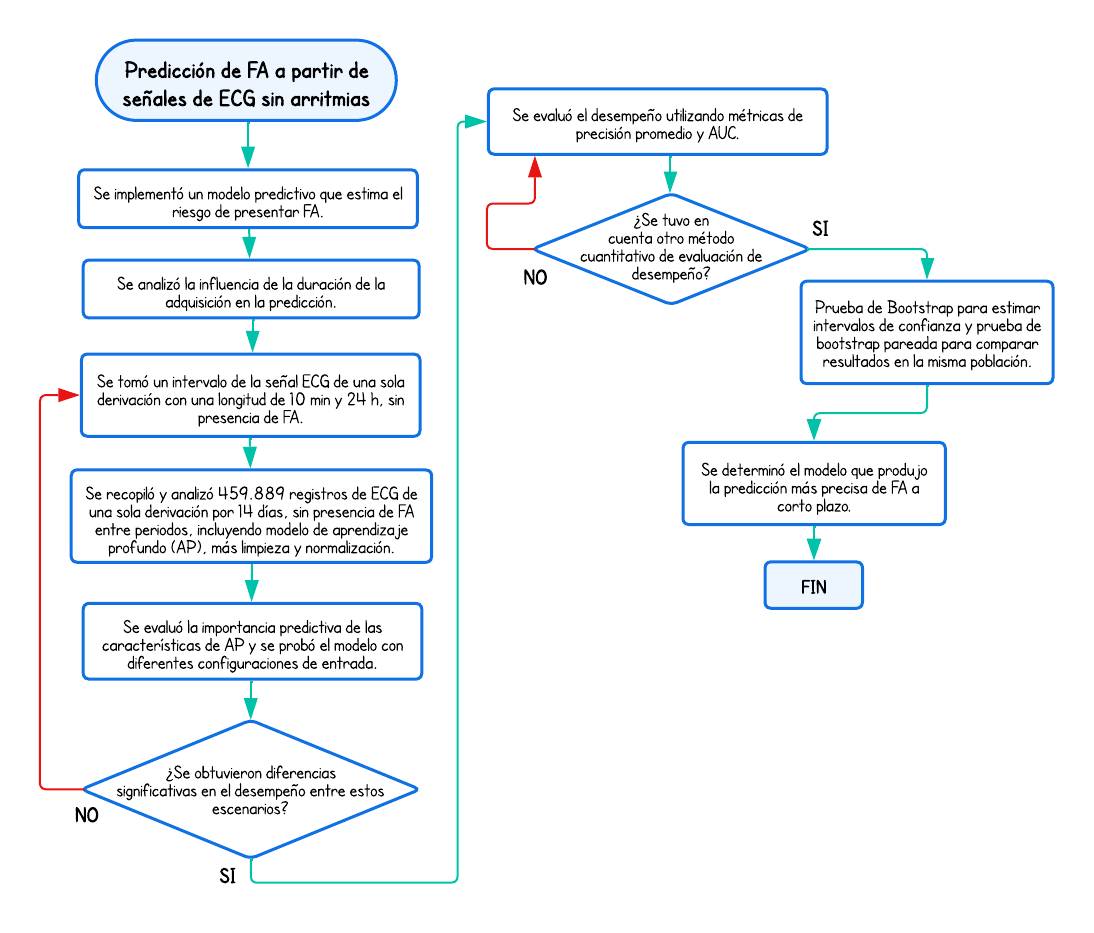

In [ ]:
#@title **Diagrama de flujo artículo 1**
from IPython.display import Image, display
display(Image(filename="/content/Diagramas de flujo_1.png", width=500, height=400))


### **Artículo 2:** Un enfoque de clasificación de arritmias mediante aprendizaje profundo utilizando ECG de una sola derivación sin detección de ondas QRS

  **Metodología:**

**1. Conjunto de datos y muestras**

  * Se extrajo 9 ritmos cardiacos de tres bases de datos: de arritmias MIT-BIH (MITDB), de fibrilación auricular (AFDB) y fibrilación ventricular MIT-BIH (VFDB). Todos los ritmos están en formato de un solo canal (single-lead), es decir, que contienen señales ECG de una sola derivación.
  * Las señales fueron preprocesadas para estandarizar la frecuencia de muestreo a 250 Hz.
  * Se capturaron segmentos de 5 o 10 s del ritmo cardiaco. Se utilizó un método de "superposición" para crear nuevos ejemplos de muestra a partir de segmentos concurrentes. (Para 5s -> 8302 muestras con 5734 para entrenamiento y 2568 para validación, y para 10 s -> 8459 muestras con 5934 para entrenamiento y 2525 para validación).

**2. Arquitectura del modelo CNN**

* La arquitectura de la CNN se basó en estudios previos de clasificación de ritmos cardíacos.
* Se diseñó una red neuronal convolucional (CNN) unidimensional, donde los segmentos de ECG de 5 y 10 segundos fueron utilizados como entradas.
* La arquitectura incluye varias capas de convolución seguidas de operaciones de Max Pooling y una capa completamente conectada para la clasificación.

**3. Entrenamiento del modelo**

  Se utilizó el algoritmo de descenso de gradiente estocástico con momento (sgdm) para entrenar el modelo, con un tamaño de minibatch de 20 y una frecuencia de validación de 30. El entrenamiento se realizó durante 200 épocas con aceleración por GPU, para acelerar el proceso. Esto ayudó a ajustar los hiper parámetros y evitar el sobreajuste.

**4. Pruebas de métodos externos**

* El modelo se evaluó utilizando un conjunto de datos de prueba para medir su precisión (mide la proporción de predicciones correctas en todas las clases (arrítmicas y normales), sensibilidad (capacidad de detectar correctamente las arritmias) y especificidad (capacidad de identificar correctamente los ritmos normales o no arritmias).
* También se realizó una prueba externa utilizando el Creighton University Ventricular Tachyarrhythmia Database (CUDB) para evaluar el rendimiento del modelo en datos no vistos.
* Se empleó esta base de datos para simular condiciones del mundo real y verificar la capacidad del modelo para clasificar correctamente las arritmias.

**5. Simulación de escenarios**

  La realizó una simulación con escenarios realistas con datos no vistos para probar si el modelo podía identificar correctamente las arritmias en condiciones reales.

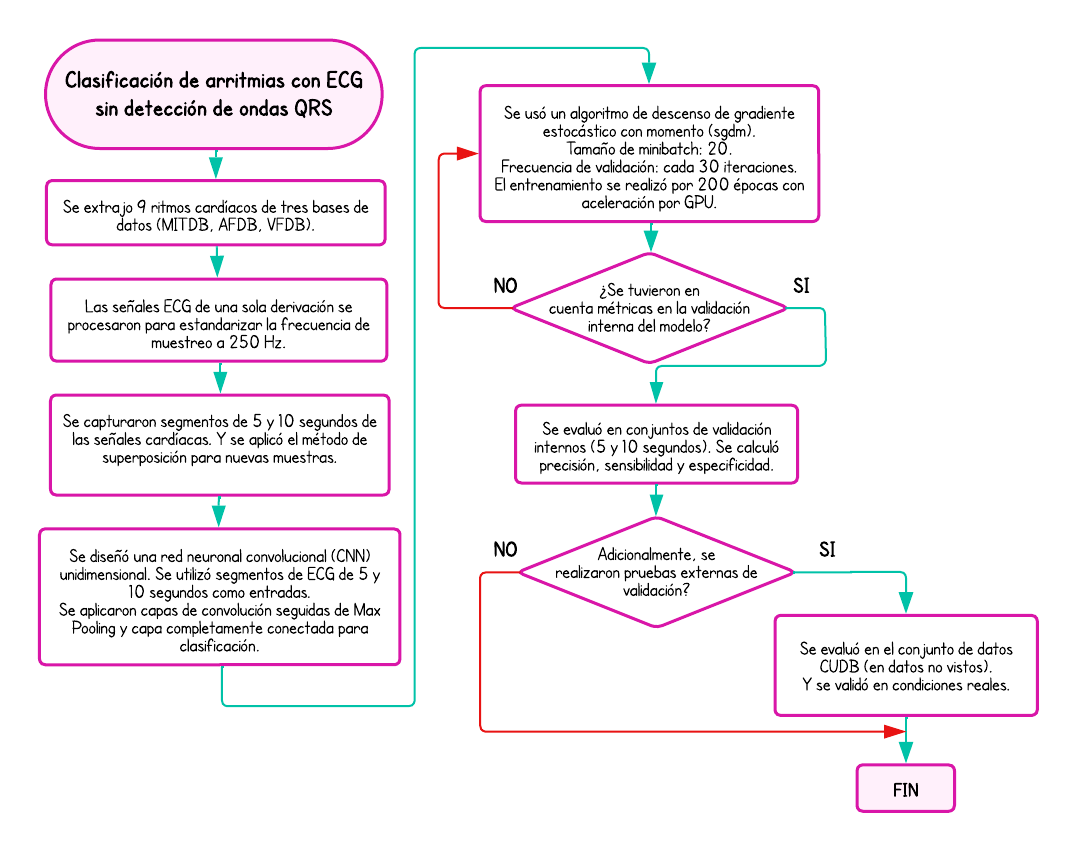

In [ ]:
#@title **Diagrama de flujo artículo 2**
from IPython.display import Image, display
display(Image(filename="/content/Diagramas de flujo_2.png", width=500, height=400))

### **Artículo 3:** Enfoque óptimo de clasificación de arritmias en múltiples etapas

**Metodología:**

**1. Diseño del estudio**

  Se recopilaron 40.258 registros de ECG de 12 derivaciones, incluidos hombres (22.588) y mujeres (17.659). Los datos del ECG se recogieron durante 10 segundos a una frecuencia de muestreo de 500 Hz incluyendo 11 tipos de ritmos y 67 hallazgos cardíacos adicionales como contracciones ventriculares prematuras (PVC), bloqueo de rama derecha (RBBB), bloqueo de rama izquierda (LBBB), y contracciones auriculares prematuras (APC).

  Los 11 ritmos identificados en los datos de ECG se fusionaron en 4 grupos principales para facilitar el entrenamiento y la clasificación de los modelos.

  * SB (Sinus Bradycardia): Incluye solo la bradicardia sinusal.
  * AFIB (Atrial Fibrillation): Agrupa la fibrilación auricular y el aleteo auricular (atrial flutter).
  * GSVT (General Supraventricular Tachycardia): Contiene la taquicardia supraventricular, taquicardia auricular, taquicardia por reentrada del nodo * AV, taquicardia por reentrada AV y el marcapasos auricular errante.
  * SR (Sinus Rhythm): Incluye el ritmo sinusal y la irregularidad sinusal.

**2. Reducción de ruido**

  Se aplicó tres técnicas de filtrado para eliminar el ruido de los ECG:

  * Filtro de pasa bajo Butterworth: Se aplicó un filtro de banda baja para eliminar el ruido de alta frecuencia (por encima de 50 Hz) que podría interferir con la señal del ECG.
  * Suavizado Robust LOESS: Se utilizó el método de suavizado LOESS (Locally Estimated Scatterplot Smoothing) para eliminar la desviación de la línea base
  * Suavizado de Medias No Locales: Se implementó un suavizado de medias no locales para eliminar el ruido restante.

**3. Extracción y selección de características**

  * Se reescaló los datos de ECG utilizando el algoritmo de máximo - mínimo para unificar la escala de amplitud y posteriormente se evaluó la influencia de este para la clasificación.
  * Se diseñó un método de extracción basado en la distribución empírica de las longitudes de los intervalos y las magnitudes de los picos y valles. Esto generó desde 11 hasta 39.830 características que fueron evaluadas para su capacidad de clasificación.
  * Y se realizó un  análisis  adicional  que  se  centró  en  la  selección  óptima  de   hiperparámetros  mediante  una búsqueda en cuadrícula (grid search).

**4. Modelos de clasificación por conjuntos**

  Los métodos de conjuntos estudiados incluyen dos enfoques, los cuales son:

  * Promediado: consiste  en  construir  numerosos  clasificadores  que  se  entrenan  de  forma  independiente  en  diferentes  muestras  observadas,  y  se  promedian  los  resultados  individuales.
  * Potenciado (boosting): En este enfoque, los modelos de clasificación se construyen de manera secuencial. Cada modelo sucesivo se entrena para corregir los errores cometidos por los modelos anteriores. El objetivo es obtener un modelo cuasi óptimo que minimice la probabilidad de clasificación errónea.

  Se compararon 98 combinaciones diferentes de algoritmos de clasificación, incluidos PAC, SVC, RF, ERT, GBT y EGBT. El algoritmo más destacado de este enfoque es Extreme Gradient Boosting Tree (EGBT), que mostró el mejor rendimiento en la clasificación de las arritmias en el estudio.
  
  Finalmente, se implementó un método para  lograr  la  máxima  precisión  de  clasificación (validación cruzada de 10 veces promedio de 0.992) utilizando datos de validación externa MIT-BIH.

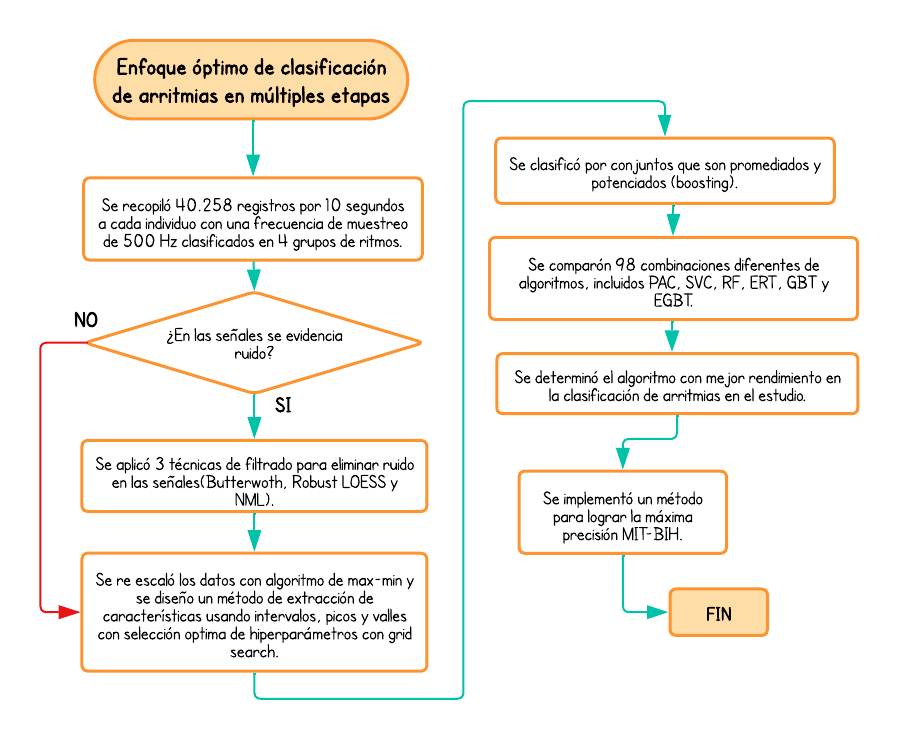

In [ ]:
#@title **Diagrama de flujo artículo 3**
from IPython.display import Image, display
display(Image(filename="/content/Diagramas de flujo_3.png", width=500, height=400))

## **2. Carga de datos**

Se toma el set de datos de: https://figshare.com/collections/ChapmanECG/4560497/1

In [ ]:
# Librerias a usar a lo largo de la practica
import seaborn as sns
import matplotlib.pyplot as plt;
import numpy as np;
import scipy.io as sio;
import os
from google.colab import drive
import pandas as pd
from scipy.stats import shapiro , levene, mannwhitneyu
from scipy.stats import kstest, norm
from scipy.signal import detrend
from scipy import fft
from scipy.fft import fftfreq
import csv

drive.mount('/content/drive')

Mounted at /content/drive


De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). Esta información está en el archivo Diagnostics.xlsx

In [ ]:
archivo_excel = "/content/drive/MyDrive/Colab_Notebooks/Diagnostics.xlsx"

df = pd.read_excel(archivo_excel) # se carga el excel

#filas donde la columna 'Rhythm' sea 'SB' o 'AFIB'
filtros = df[df['Rhythm'].isin(['SB', 'AFIB'])]
filtros.head()

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
5,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
6,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395


In [ ]:
total_registros = filtros.shape[0]
print(f"Total de registros con SB y AFIB en la columna 'Rhythm': {total_registros}")

Total de registros con SB y AFIB en la columna 'Rhythm': 5669


In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/ECGDataDenoised.zip .
!unzip ECGDataDenoised.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: ECGDataDenoised/MUSE_20180116_125802_57000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125812_73000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125822_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125825_58000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125842_09000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125845_27000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125847_39000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125906_02000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125918_29000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125919_34000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125921_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125925_64000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125946_45000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125948_54000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_130000_80000.csv  
  i

In [ ]:
directorio_actual=os.getcwd()
print(directorio_actual)
archivos = os.listdir(directorio_actual + "/ECGDataDenoised")
print(len(archivos))
print(archivos)

/content
10646
['MUSE_20180120_121001_43000.csv', 'MUSE_20180210_132908_17000.csv', 'MUSE_20180116_131029_02000.csv', 'MUSE_20180116_120813_70000.csv', 'MUSE_20180116_175255_75000.csv', 'MUSE_20180113_073756_28000.csv', 'MUSE_20180113_183723_26000.csv', 'MUSE_20180113_181610_53000.csv', 'MUSE_20180113_133402_02000.csv', 'MUSE_20180112_124630_80000.csv', 'MUSE_20180115_130545_31000.csv', 'MUSE_20180209_173704_09000.csv', 'MUSE_20180113_134942_37000.csv', 'MUSE_20180209_125816_49000.csv', 'MUSE_20180116_125842_09000.csv', 'MUSE_20180114_120114_84000.csv', 'MUSE_20180112_122717_13000.csv', 'MUSE_20180209_123939_95000.csv', 'MUSE_20180118_170508_87000.csv', 'MUSE_20180210_130710_01000.csv', 'MUSE_20180113_122318_73000.csv', 'MUSE_20180113_172714_60000.csv', 'MUSE_20180118_173613_78000.csv', 'MUSE_20180119_170145_80000.csv', 'MUSE_20180116_130925_73000.csv', 'MUSE_20180112_165018_93000.csv', 'MUSE_20180112_133525_62000.csv', 'MUSE_20180116_133517_43000.csv', 'MUSE_20180712_151144_27000.csv'

In [ ]:
print(filtros.columns)

Index(['FileName', 'Rhythm', 'Beat', 'PatientAge', 'Gender', 'VentricularRate',
       'AtrialRate', 'QRSDuration', 'QTInterval', 'QTCorrected', 'RAxis',
       'TAxis', 'QRSCount', 'QOnset', 'QOffset', 'TOffset'],
      dtype='object')


Se filtran los registros dependiendo del estado o condicion (AFIB o SB)

In [ ]:
pacientes_filtrados = filtros['FileName'].tolist() # Lista de nombres de archivos de pacientes filtrados

#filtran los archivos que corresponden a los pacientes filtrados
archivos_filtrados = [archivo for archivo in archivos if archivo.split('.')[0] in pacientes_filtrados]

#listas separadas para SB y AFIB
archivos_SB = [archivo for archivo in archivos_filtrados if filtros[filtros['FileName'] == archivo.split('.')[0]]['Rhythm'].values[0] == 'SB']
archivos_AFIB = [archivo for archivo in archivos_filtrados if filtros[filtros['FileName'] == archivo.split('.')[0]]['Rhythm'].values[0] == 'AFIB']

print(f"Se encontraron {len(archivos_SB)} archivos correspondientes a los pacientes con SB.")
print(f"Se encontraron {len(archivos_AFIB)} archivos correspondientes a los pacientes con AFIB.")
print("Archivos SB:", archivos_SB)
print("Archivos AFIB:", archivos_AFIB)

Se encontraron 3889 archivos correspondientes a los pacientes con SB.
Se encontraron 1780 archivos correspondientes a los pacientes con AFIB.
Archivos SB: ['MUSE_20180116_131029_02000.csv', 'MUSE_20180116_175255_75000.csv', 'MUSE_20180113_073756_28000.csv', 'MUSE_20180113_134942_37000.csv', 'MUSE_20180116_125842_09000.csv', 'MUSE_20180114_120114_84000.csv', 'MUSE_20180112_122717_13000.csv', 'MUSE_20180118_170508_87000.csv', 'MUSE_20180113_172714_60000.csv', 'MUSE_20180118_173613_78000.csv', 'MUSE_20180119_170145_80000.csv', 'MUSE_20180116_130925_73000.csv', 'MUSE_20180112_165018_93000.csv', 'MUSE_20180112_133525_62000.csv', 'MUSE_20180112_134825_56000.csv', 'MUSE_20180112_122519_94000.csv', 'MUSE_20180119_175556_08000.csv', 'MUSE_20180113_122839_27000.csv', 'MUSE_20180114_122018_54000.csv', 'MUSE_20180114_074408_60000.csv', 'MUSE_20180116_121513_34000.csv', 'MUSE_20180114_121222_88000.csv', 'MUSE_20180114_125822_71000.csv', 'MUSE_20180115_131223_22000.csv', 'MUSE_20180114_072330_81000.

Ahora, se va a realizar el analisis de cada registro en la derivacion II. Por lo que es necesario crear una funcion que permita obtener los datos asociados a la derivacion II de cualquier registro

In [ ]:
column_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
ruta_base = os.path.join(directorio_actual, "ECGDataDenoised")

def cargar_ecg(ruta_base, archivo, column_names):
    ruta_archivo = os.path.join(ruta_base, archivo)
    df_ecg = pd.read_csv(ruta_archivo, names=column_names)
    return df_ecg['II'].values  # Retornar los datos de la columna 'II'


Se almacenan los datos asociados a la derivacion II en un diccionario. Esto para cada condicion (AFIB y SB)

In [ ]:
# Diccionario para almacenar los datos de la columna II de cada archivo AFIB
datos_ecg_afib = {}

# Se itera sobre cada archivo en la lista archivos_AFIB
for archivo in archivos_AFIB:
    # Se extraen los datos de la columna II y se almacenan en el diccionario
    datos_ecg_afib[archivo] = cargar_ecg(ruta_base, archivo, column_names)


In [ ]:
print("La derivacion II de cada registro de AFIB es: ")
datos_ecg_afib

La derivacion II de cada dato de AFIB es: 


{'MUSE_20180120_121001_43000.csv': array([ 6.1011,  1.0327, -3.3008, ..., 34.568 , 47.086 , 62.062 ]),
 'MUSE_20180113_183723_26000.csv': array([10.696 ,  8.7735,  6.8536, ...,  2.7214,  7.8553, 12.572 ]),
 'MUSE_20180113_122318_73000.csv': array([-9.132 ,  2.3132, 11.041 , ..., 16.542 , 19.069 , 23.376 ]),
 'MUSE_20180116_133517_43000.csv': array([ 30.34 ,  35.315,  39.51 , ..., 152.82 , 189.76 , 226.25 ]),
 'MUSE_20180114_070940_66000.csv': array([28.058, 28.54 , 28.679, ..., 11.274, 21.346, 32.898]),
 'MUSE_20180114_071043_95000.csv': array([-24.694, -25.045, -25.396, ...,  20.496,  21.73 ,  22.125]),
 'MUSE_20180113_135249_45000.csv': array([-102.58 , -100.8  ,  -97.034, ...,  -97.233,  -57.977,  -16.343]),
 'MUSE_20180115_133326_40000.csv': array([ 6.6281e+02,  6.6518e+02,  6.6605e+02, ...,  3.8694e-01,
        -4.1267e-01, -2.9056e+00]),
 'MUSE_20180118_173300_98000.csv': array([147.24 , 138.46 , 131.96 , ...,  30.313,  31.189,  30.087]),
 'MUSE_20180119_174405_31000.csv': array(

In [ ]:
# Diccionario para almacenar los datos de la columna II de cada archivo SB
datos_ecg_sb_dict = {}

# Se itera sobre cada archivo en la lista archivos_AFIB
for archivo in archivos_SB:
    # Se extraen los datos de la columna II y se almacenan en el diccionario
    datos_ecg_sb_dict[archivo] = cargar_ecg(ruta_base, archivo, column_names)

In [ ]:
print("La derivacion II de cada registro de SB es: ")
datos_ecg_sb_dict

La derivacion II de cada registro de SB es: 


{'MUSE_20180116_131029_02000.csv': array([-60.113, -65.165, -69.074, ..., -36.94 , -34.086, -29.201]),
 'MUSE_20180116_175255_75000.csv': array([-37.295, -38.026, -39.07 , ..., 233.6  , 240.02 , 245.47 ]),
 'MUSE_20180113_073756_28000.csv': array([-35.859 ,  -5.3564,  18.849 , ..., 208.37  , 206.94  , 203.43  ]),
 'MUSE_20180113_134942_37000.csv': array([-32.511, -31.278, -29.792, ...,  40.503,  67.388,  96.737]),
 'MUSE_20180116_125842_09000.csv': array([-31.011 , -23.828 , -17.487 , ..., -16.639 , -13.286 ,  -9.2116]),
 'MUSE_20180114_120114_84000.csv': array([11.316 , 18.918 , 25.456 , ...,  5.3201,  9.5056, 14.539 ]),
 'MUSE_20180112_122717_13000.csv': array([ 32.846,  31.697,  30.955, ..., -24.409, -24.292, -21.667]),
 'MUSE_20180118_170508_87000.csv': array([-12.409 , -11.846 , -11.086 , ...,   5.5721,   3.2182,   1.2547]),
 'MUSE_20180113_172714_60000.csv': array([-3.5786, -3.908 , -4.2276, ..., -8.839 , -6.7663, -4.0181]),
 'MUSE_20180118_173613_78000.csv': array([28.067, 27.82

Se realiza una señal promedio de los primeros 15 registros de SB y los primeros 15 registros de AFIB, esto siguiendo cantidad de registros que utilizaron en el articulo (15) [1], y posteriormente seran utilizados para el calculo del biespectro y la bicoherencia

In [ ]:
def calcular_promedio_15_senales(diccionario):
    # primeras 15 señales del diccionario
    primeras_15_claves = list(diccionario.keys())[:15]
    señales = [diccionario[clave] for clave in primeras_15_claves]

    #verificamos que todas las señales tengan la misma longitud
    longitud = min(len(señal) for señal in señales)
    señales_recortadas = [señal[:longitud] for señal in señales]

    #array de NumPy para calcular el promedio por punto
    señales_array = np.array(señales_recortadas)
    señal_promedio = np.mean(señales_array, axis=0) #Promedio

    return señal_promedio

# Llamada de la función
señal_promedioAFIB = calcular_promedio_15_senales(datos_ecg_afib)
print("Señal promedio primero 15 valores de AFIB:", señal_promedioAFIB)

señal_promedioSB = calcular_promedio_15_senales(datos_ecg_sb_dict)
print("Señal promedio primeros 15 valores de SB:", señal_promedioSB)

Señal promedio primero 15 valores de AFIB: [50.66268    50.80481333 51.37204667 ... 25.06708933 37.93098867
 51.52129333]
Señal promedio primeros 15 valores de SB: [-23.30047333 -22.37375333 -21.3355     ...  40.28764667  41.493874
  42.81625333]


## **3. Programar las fórmulas 1 al 4 que se encuentran en el artículo. Consultar que significado y utilidad del biespectro (Realice la gráfica)**

**Significado y utilidad del Biespectro**


El bispectro es una técnica avanzada de análisis espectral que forma parte del análisis de señales de orden superior (HOS, por sus siglas en inglés). A diferencia del espectro de potencia tradicional, que solo mide la distribución de la energía de una señal en función de las frecuencias, el bispectro se enfoca en las relaciones entre diferentes componentes frecuenciales, lo que permite detectar y analizar el acoplamiento de fase no lineal entre ellas. Este acoplamiento cuadrático de fase entre dos frecuencias f1​ y f2​ genera una nueva frecuencia f1+f2​, y es una característica clave de los procesos no lineales [1].

En el contexto del articulo [1], el bispectro se utiliza para analizar señales de electrocardiograma (ECG) y evaluar alteraciones en la dinámica cardíaca. Las señales de ECG, generadas por los impulsos eléctricos que regulan la actividad del corazón, son un ejemplo típico de señales no lineales. En este caso, el análisis bispectral permite evaluar el comportamiento de las interacciones no lineales en la señal cardíaca y detectar anomalías que podrían indicar la presencia de enfermedades. El estudio muestra que en sujetos sanos, el bispectro revela un fuerte acoplamiento de fase entre la frecuencia del pulso (alrededor de 1 Hz) y otras frecuencias más altas, lo que sugiere un comportamiento cardíaco bien regulado y con un sistema dinámico en funcionamiento óptimo​

Por otro lado, en pacientes con enfermedades cardíacas como disritmia o infarto de miocardio, el análisis bispectral muestra una clara disminución o pérdida del acoplamiento de fase entre las frecuencias. Esto indica una alteración en la regulación no lineal del sistema eléctrico del corazón, que puede estar relacionada con una disfunción subyacente. Además, se observa una redistribución de la energía hacia frecuencias más altas, lo que sugiere una interrupción en los mecanismos cardíacos normales que mantienen la coherencia en las frecuencias más bajas [1]. Esta redistribución de energía y pérdida de acoplamiento es un signo característico de irregularidades en el comportamiento cardíaco y puede ser indicativo de una patología cardíaca​.

**Implementacion de las formulas**

* Con el fin de verificar las operaciones, se puede utilizar la derivacion II de cualquiera de los registros. A continuación se utiliza el primer registro SB y se aplican las diferentes operaciones solicitadas

Registro ECG (SB) - Derivacion II:
[-60.113 -65.165 -69.074 ... -36.94  -34.086 -29.201]


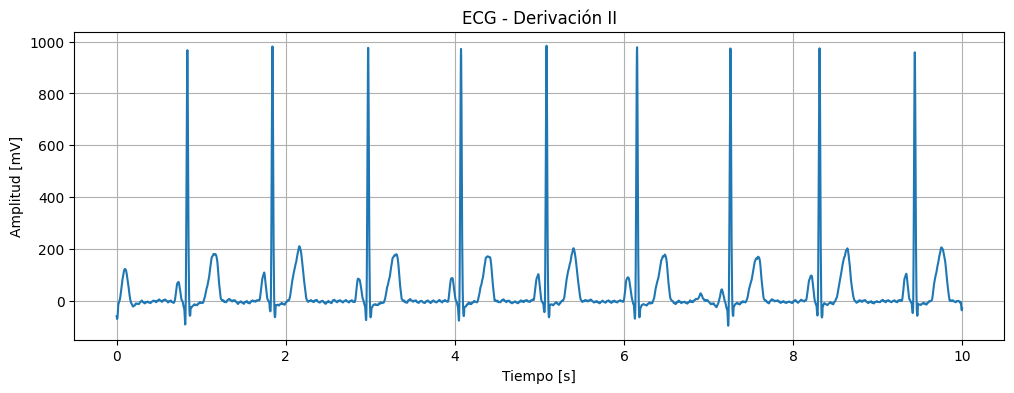

In [ ]:
# verificacion funcionamiento de ecuaciones solo con un dato
ruta_base = os.path.join(directorio_actual, "ECGDataDenoised")
registro = archivos_SB[0] #solo se toma el primer dato de la segunda detivacio de SB

# Datos ECG para un registro de SB
datos_ecg_sb = cargar_ecg(ruta_base, registro, column_names)
print("Registro ECG (SB) - Derivacion II:")
print(datos_ecg_sb)
fs = 500  # Frecuencia de muestreo
tiempo = np.arange(0, len(datos_ecg_sb) / fs, 1 / fs)

plt.figure(figsize=(12, 4))
plt.plot(tiempo, datos_ecg_sb)
plt.title("ECG - Derivación II")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.grid()
plt.show()


En la grafica se muestra la señal ECG correspondiente a la segunda derivada de un registro de SB, sin filtrado ni compression. Se observan los picos que corresponden a los complejos QRS, característicos de la despolarización ventricular. Se evidencia ademas una separacion uniforme entre picos lo que nos indica un ritmo cardíaco constante, ademas de esto se evidencia un pequeño offset y una alta amplitud (cercana a 1000 mV) ya que la señal no se ha procesado aun.

**Formula 1) Detrending**

$$
\delta_{(n)} = \frac{1}{k} \sum_{i=1}^{k} (x_{(0)}(i) - x_{(n)}(i))^2
$$

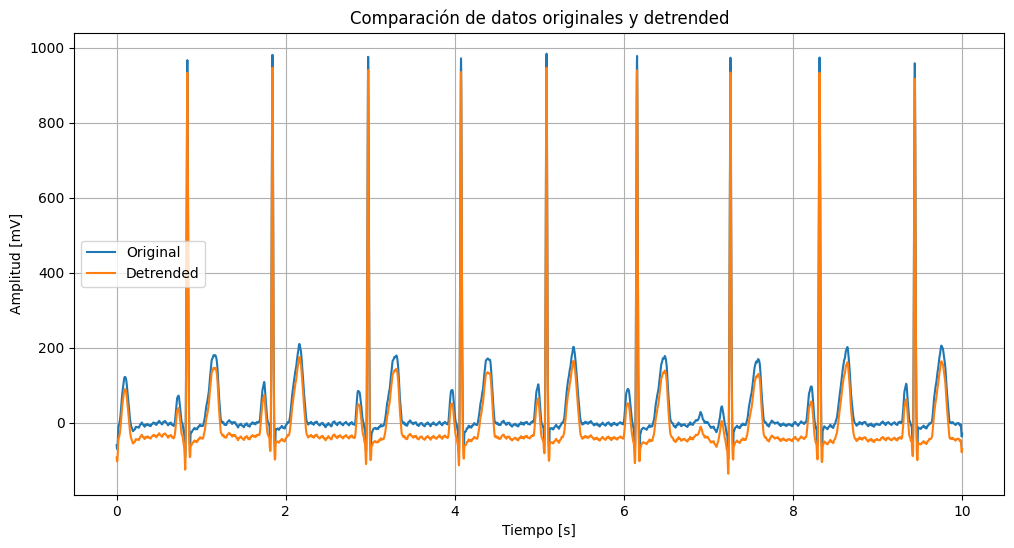

In [ ]:
# Se usa funcion Detrend de la libreria de scipy directamente, siguiendo indicacion de la profe

datos_detrended = detrend(datos_ecg_sb) #siguiendo con el ejemplo solo con el dato 1 de sb, para comprobar
# visualización de los datos originales y los datos detrended
plt.figure(figsize=(12, 6))
plt.plot(tiempo, datos_ecg_sb, label='Original')
plt.plot(tiempo, datos_detrended, label='Detrended')
plt.title("Comparación de datos originales y detrended")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.legend()
plt.grid()
plt.show()

En la gráfica se observa una comparación entre la señal ECG original (en azul) y la señal tras aplicar el detrend (en naranja). Se evidencia que el detrend ha eliminado el offset presente en la señal original ya que se ha ajustado la línea base de la señal más cerca de cero. Aunque ambas señales mantienen las mismas características principales, como la frecuencia y como los picos correspondientes a los complejos QRS, la señal con el detrended evidencia una disminución en la amplitud general. Esto se debe a que el detrend, como se evidencio en el preyecto uno, remueve componentes de baja frecuencia, como tendencias o desplazamientos, que pueden afectar el análisis posterior de la señal.

**Formula 2)  Compression (Normalize)**

$$
s(t_k) = \frac{C(t_k) - x_{min}}{x_{max} - x_{min}}
$$

In [ ]:
def normalize_ecg(c_tk, x_min, x_max):
    return (c_tk - x_min) / (x_max - x_min)

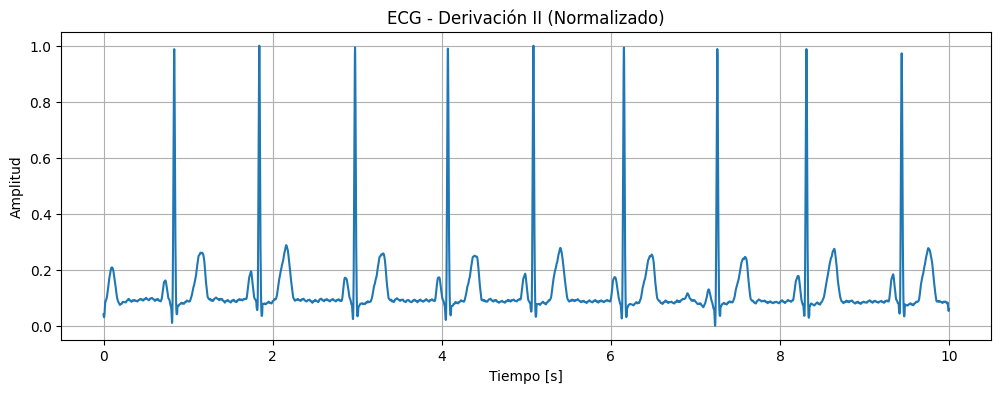

In [ ]:
# Continuacion verifiacion solo con un dato de SB
x_min = np.min(datos_detrended)
x_max = np.max(datos_detrended)

# Se aplica la función de compresión a los datos
datos_ecg_comprimidos = normalize_ecg(datos_detrended, x_min, x_max)

# Visualizacion de los datos normalizados
plt.figure(figsize=(12, 4))
plt.plot(tiempo, datos_ecg_comprimidos)
plt.title("ECG - Derivación II (Normalizado)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


En la grafica podemos observar la señal ECG de la derivación II después de ser aplicado el detrend y de ser normalizada. El proceso de normalización ha ajustado la amplitud de la señal dentro de un rango de 0 a 1, lo que permite una mejor comparación de la variabilidad relativa de la señal. Sin embargo, se puede notar que este proceso ha introducido un pequeño offset, desplazando la línea base de la señal por encima de cero. Esto indica que será necesario aplicar nuevamente el detrend para corregir este desplazamiento y asegurar que la línea base de la señal se encuentre alineada con el eje horizontal, permitiendo un análisis más preciso.

**Formula 3) Biespectro**

$$
b(f_1, f_2) = \sum_{j=1}^{N} X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)
$$

In [ ]:
def bispectrum(ecg_signal, segment_size, fs):
    # Donde ecg_signal es la señal de interes,
    # segment_size es el tamaño del segmento como menciona el articulo
    # fs es la frecuencia de muestreo
    N = len(ecg_signal) // segment_size  # segmentos
    freq = int(20 * segment_size / fs)  # bispectro a 20 Hz como menciona el articulo, y se establece el maximo para 20 Hz
    bispec = np.zeros((freq, freq), dtype=complex)

    for j in range(N):
        segment = ecg_signal[j*segment_size:(j+1)*segment_size]
        Xj = fft.fft(segment)  # fft del segmento en cada ciclo

        # bispectro en el rango 0-20 Hz siguiendo el articulo
        for f1 in range(freq):
            for f2 in range(freq - f1):
                bispec[f1, f2] += Xj[f1] * Xj[f2] * np.conj(Xj[f1 + f2])

    return bispec


Ahora se realiza el calculo del biespectro con la senales promedio obtenidas previamente, tanto para SB como para AFIB.

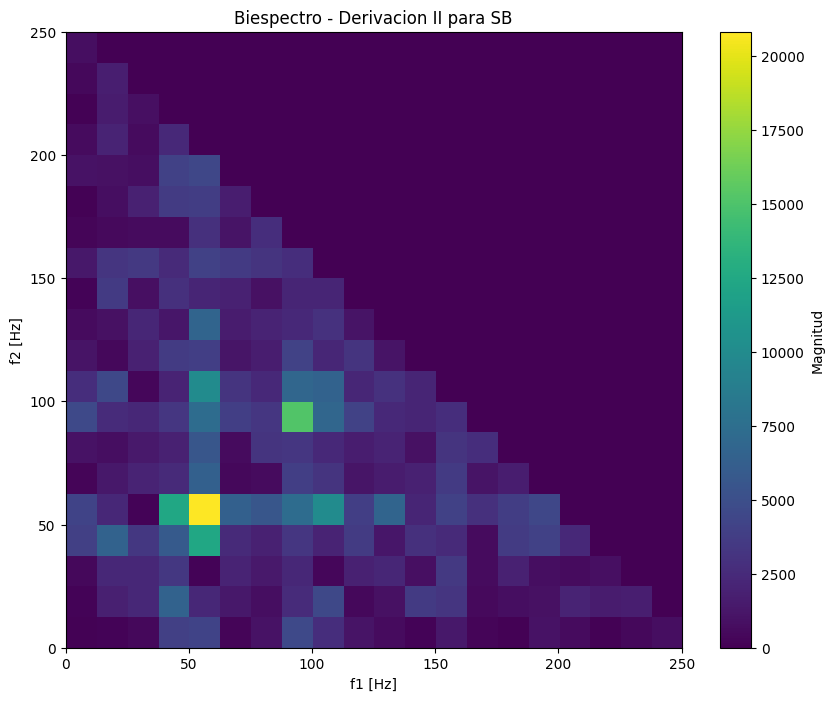

In [ ]:
# comprobación con el promedio 15 primeros datos de sb
dtSB = detrend(señal_promedioSB) # Se aplica la función detrend a los datos
x_min = np.min(dtSB)
x_max = np.max(dtSB)
dt_compSB = normalize_ecg(dtSB, x_min, x_max) # Se aplica la función de compresión a los datos
dt_dSB = detrend(dt_compSB)

segment_size = 500  # Tamano del segmento en muestras este es tomado segun Jhon de 500 a 1000
fs = 500 # Frecuencia de muestreo

# Aplicar la función del bispectro a los datos
bispec = bispectrum(dt_dSB, segment_size, fs)

# Visualizacion
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(bispec), extent=[0, fs/2, 0, fs/2], origin='lower')
plt.title('Biespectro - Derivacion II para SB')
plt.xlabel('f1 [Hz]')
plt.ylabel('f2 [Hz]')
plt.colorbar(label='Magnitud')
plt.show()

En la grafica de biespectro de la segunda derivación para SB, se evidencia que las regiones de mayor magnitud (indicadas en amarillo) se concentran alrededor de las frecuencias bajas, cerca de los 50 Hz, segun el articulo "Enfoque óptimo de clasificación de arritmias en múltiples etapas" [4], lo cual puede estar relacionado con la frecuencia cardíaca fundamental y sus armónicos, que son características típicas en señales ECG. Estas zonas de alta energía indican una mayor interacción entre estas frecuencias en el bispectro, sugiriendo que hay una actividad no lineal significativa en estas frecuencias. Esto es consistente con lo que se esperaría de una señal de ECG de ritmo sinusal, que presenta patrones cíclicos regulares. El patrón de simetría en el biespectro confirma la estabilidad de las relaciones entre estas frecuencias en la señal ECG SB.

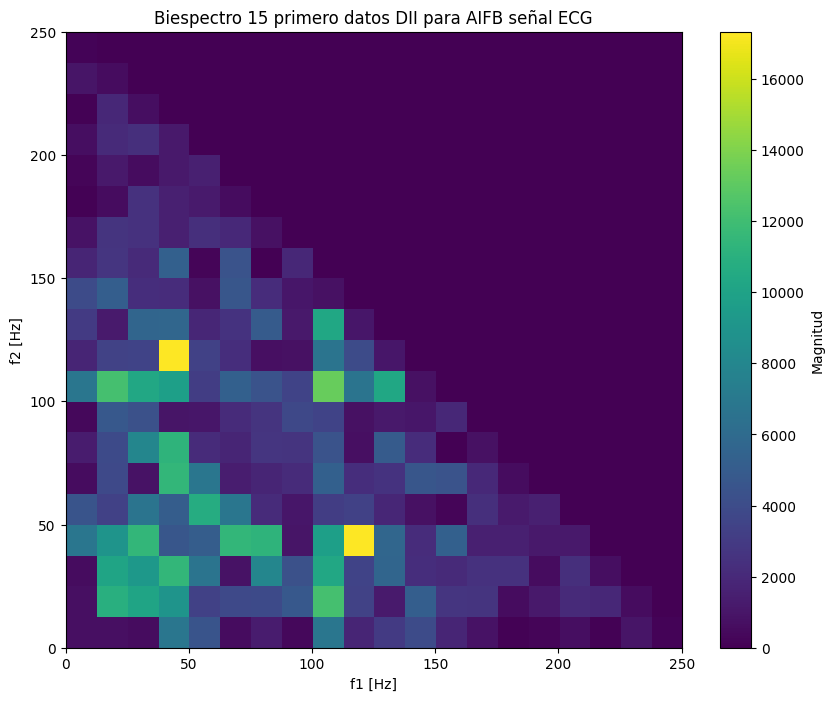

In [ ]:
# comprobación con el promedio 15 primeros datos de AIFB
dtAFIB = detrend(señal_promedioAFIB)
x_min = np.min(dtAFIB)
x_max = np.max(dtAFIB)
dt_compAFIB = normalize_ecg(dtAFIB, x_min, x_max)
dt_dAFIB = detrend(dt_compAFIB)

segment_size = 500  # Tamano del segmento en muestras este es tomado segun Jhon de 500 a 1000
fs = 500 #Frecuencia de muestreo

# Aplicar la función del bispectro a los datos
bispec = bispectrum(dt_dAFIB, segment_size, fs)

# Visualizacion
plt.figure(figsize=(10, 8))
plt.imshow(np.abs(bispec), extent=[0, fs/2, 0, fs/2], origin='lower')
plt.title('Biespectro 15 primero datos DII para AIFB señal ECG')
plt.xlabel('f1 [Hz]')
plt.ylabel('f2 [Hz]')
plt.colorbar(label='Magnitud')
plt.show()

En la gráfica del biespectro para los primeros 15 archivos de la señal ECG con fibrilación auricular (AFIB), observamos diferencias clave en comparación con la señal SB. Aunque las frecuencias bajas siguen presentando interacciones significativas, como se muestra en los puntos amarillos cercanos a los 50 Hz, las magnitudes y las áreas de alta energía no están tan concentradas como en la señal SB, esto se debe a la estapa catodica y menos regular del ritmo cardíaco en pacientes con fibrilación auricular [4].

Las zonas de mayor magnitud están más dispersas, lo que nos indica que la señal AFIB presenta una mayor variabilidad en la interacción de las frecuencias, reflejando la complejidad del ritmo arrítmico característico de la fibrilación auricular [3]. No solo las frecuencias bajas están involucradas, sino que también hay actividad significativa en las frecuencias intermedias, lo que indica una mayor dispersión de la energía en el biespectro. En la AIFB donde la señal ECG tiende a ser más irregular y caótica, afectando las relaciones entre las frecuencias de manera más dispersa.

**Formula 4) Bicoherencia**

$$
B(f_1, f_2) = \frac{\left|\sum_{j=1}^{N} X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)\right|}{\sum_{j=1}^{N} \left|X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)\right|}
$$


In [ ]:
def bicoherence(ecg_signal, segment_size, fs):
    # Similar al biespectro ecg_signal es la señal de interes
    # segmen_size es el tamaño del segmento como menciona el articulo
    # fs frecuencia de muestreo

    N = len(ecg_signal) // segment_size  # cantidad de segmentos
    freq_limit = int(20 * segment_size / fs)  # bispectro a 20 Hz como menciona el articulo, y se establece el maximo para 20 Hz

    bicoherencia_numerator = np.zeros((freq_limit, freq_limit), dtype=float) #Para valores del numerador
    bicoherencia_denominator = np.zeros((freq_limit, freq_limit), dtype=float) #para valores del deniminadore

    for j in range(N):  # fft del segmento en cada ciclo
        segment = ecg_signal[j * segment_size : (j + 1) * segment_size]
        Xj = fft.fft(segment)

        # para el numerador y el denominador de la bicoherencia
        for f1 in range(freq_limit):
            for f2 in range(f1, freq_limit - f1):
                bispec = Xj[f1] * Xj[f2] * np.conj(Xj[f1 + f2])
                bicoherencia_numerator[f1, f2] += bispec
                bicoherencia_denominator[f1, f2] += np.abs(Xj[f1]) * np.abs(Xj[f2]) * np.abs(Xj[f1 + f2])

    # Una vez obtenidos el numerado y el denominador siguiendo la formula se acalcula la bicoherencia
    bicoherence = np.zeros((freq_limit, freq_limit))
    non_zero_denominator = bicoherencia_denominator > 0
    bicoherence[non_zero_denominator] = np.abs(bicoherencia_numerator[non_zero_denominator]) / bicoherencia_denominator[non_zero_denominator]

    return bicoherence

Se realiza la implementacion de forma similar al biespectro.

<ipython-input-22-e2687a9a449b>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoherencia_numerator[f1, f2] += bispec


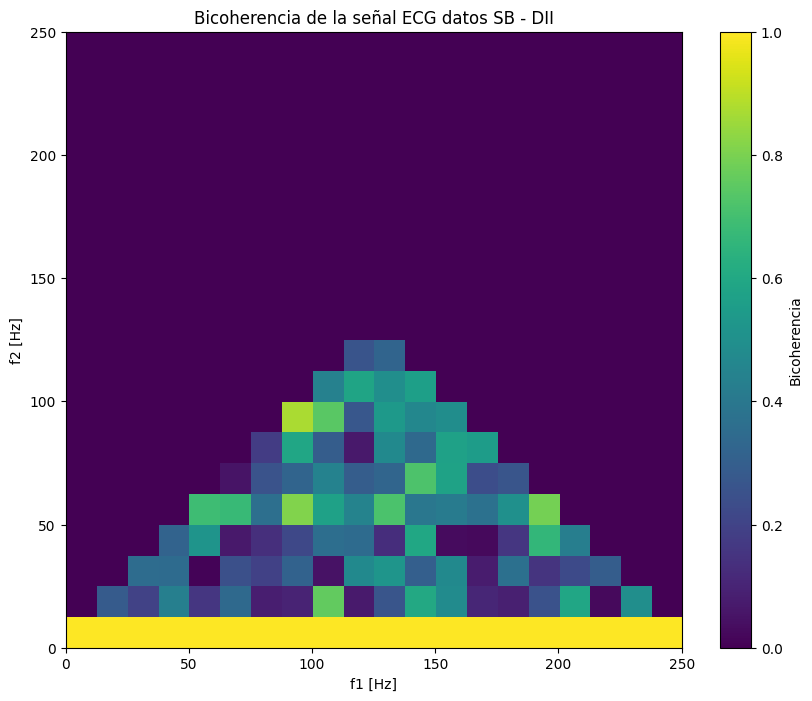

In [ ]:
#Verificacion con sb de los 15 datos el promedio
#con función de bicoherencia a los datos
segment_size = 500  # Tamano del segmento en muestras segun Jhon puede ser de 500 a 1000
fs = 500 # Frecuencia de muestreo en Hz segun teoria ECG
bicoher = bicoherence(señal_promedioSB, segment_size, fs)


# Mostrar la imagen usando las magnitudes
plt.figure(figsize=(10, 8))
plt.imshow(bicoher, extent=[0, fs/2, 0, fs/2], origin='lower')
plt.title('Bicoherencia de la señal ECG datos SB - DII')
plt.xlabel('f1 [Hz]')
plt.ylabel('f2 [Hz]')
plt.colorbar(label='Bicoherencia')
plt.show()

<ipython-input-22-e2687a9a449b>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoherencia_numerator[f1, f2] += bispec


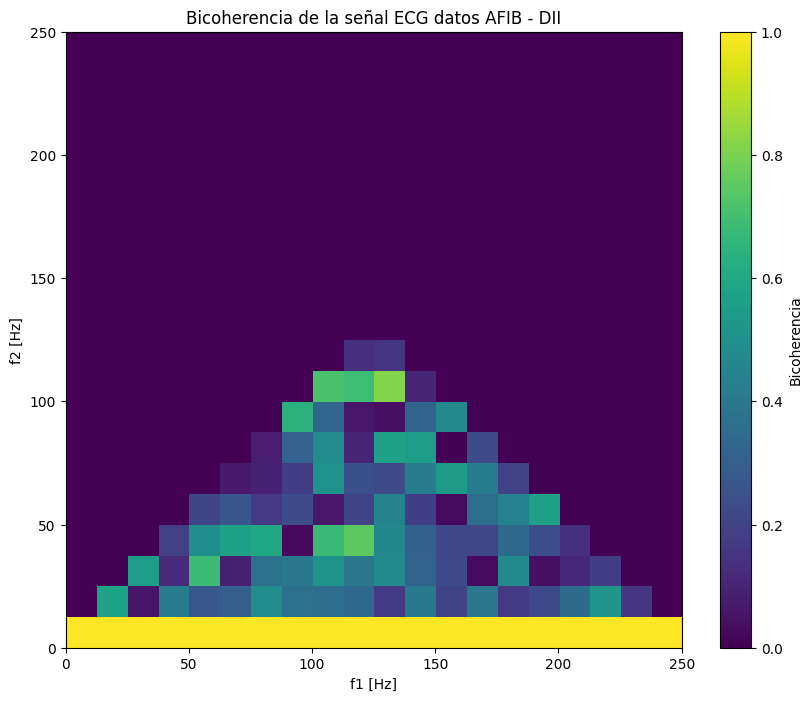

In [ ]:
#Verificacion con AFIB de los 10 datos el promedio
#función de bicoherencia uso
segment_size = 500  # Tamano del segmento en muestras segun Jhon puede ser de 500 a 1000
fs = 500 # Frecuencia de muestreo en Hz segun teoria ECG
bicoher = bicoherence(señal_promedioAFIB, segment_size, fs)

# Convertir los datos complejos a magnitudes
#bicoher_magnitude = np.abs(bicoher)

# Mostrar la imagen usando las magnitudes
plt.figure(figsize=(10, 8))
plt.imshow(bicoher, extent=[0, fs/2, 0, fs/2], origin='lower')
plt.title('Bicoherencia de la señal ECG datos AFIB - DII')
plt.xlabel('f1 [Hz]')
plt.ylabel('f2 [Hz]')
plt.colorbar(label='Bicoherencia')
plt.show()

A continuacion, con fin de ver la diferencia al aplicar detrend y compression, realiza el calculo de bicoherencia con las senales promediadas de SB y de AFIB aplicando funciones de detrend y compression.

<ipython-input-22-e2687a9a449b>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoherencia_numerator[f1, f2] += bispec


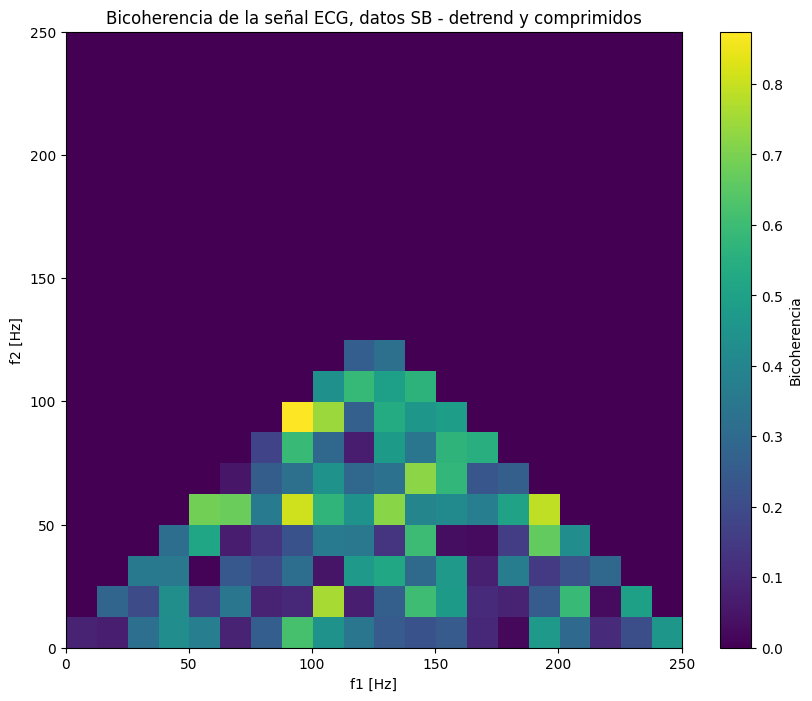

In [ ]:
dtSB = detrend(señal_promedioSB) # Se aplica la función detrend a los datos
x_min = np.min(dtSB)
x_max = np.max(dtSB)
dt_compSB = normalize_ecg(dtSB, x_min, x_max) # Se aplica la función de compresión a los datos
dt_dSB = detrend(dt_compSB)

segment_size = 500  # Tamano del segmento en muestras segun Jhon puede ser de 500 a 1000
fs = 500 # Frecuencia de muestreo en Hz segun teoria ECG
bicoher = bicoherence(dt_dSB, segment_size, fs)

plt.figure(figsize=(10, 8))
plt.imshow(bicoher, extent=[0, fs/2, 0, fs/2], origin='lower')
plt.title('Bicoherencia de la señal ECG, datos SB - detrend y comprimidos')
plt.xlabel('f1 [Hz]')
plt.ylabel('f2 [Hz]')
plt.colorbar(label='Bicoherencia')
plt.show()

<ipython-input-22-e2687a9a449b>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoherencia_numerator[f1, f2] += bispec


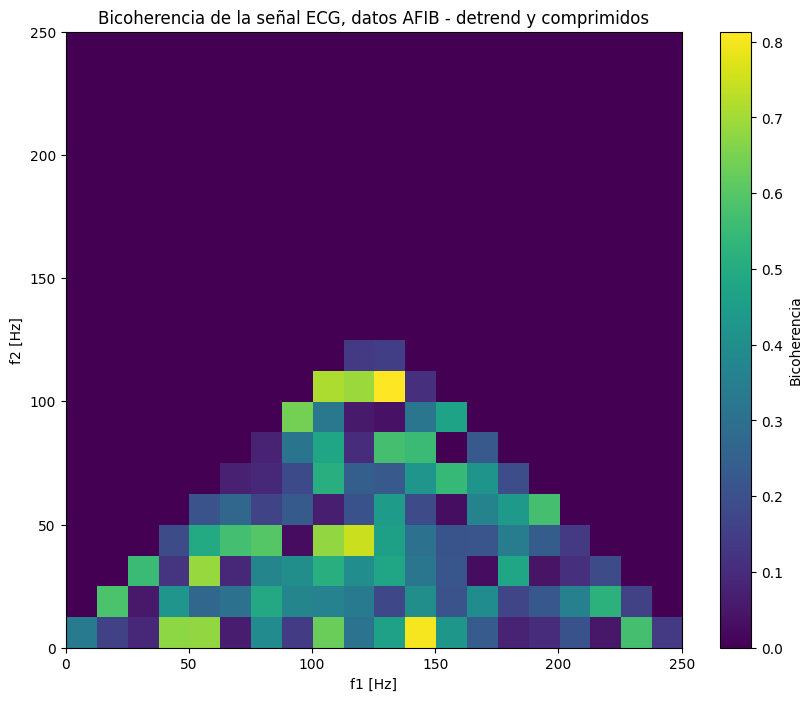

In [ ]:
dtAFIB = detrend(señal_promedioAFIB) # Se aplica la función detrend a los datos
x_min = np.min(dtAFIB)
x_max = np.max(dtAFIB)
dt_compAFIB = normalize_ecg(dtAFIB, x_min, x_max) # Se aplica la función de compresión a los datos
dt_dAFIB = detrend(dt_compAFIB)

segment_size = 500  # Tamano del segmento en muestras segun Jhon puede ser de 500 a 1000
fs = 500 # Frecuencia de muestreo en Hz segun teoria ECG
bicoher = bicoherence(dt_dAFIB, segment_size, fs)

plt.figure(figsize=(10, 8))
plt.imshow(bicoher, extent=[0, fs/2, 0, fs/2], origin='lower')
plt.title('Bicoherencia de la señal ECG, datos AFIB - detrend y comprimidos')
plt.xlabel('f1 [Hz]')
plt.ylabel('f2 [Hz]')
plt.colorbar(label='Bicoherencia')
plt.show()

**Explicacion de diferencias**

La principal diferencia entre los resultados sin detrend ni compresión y los resultados con estos procesos aplicados radica en la regularidad y claridad de las relaciones de fase entre las frecuencias. En el gráfico sin detrend ni compresión, los valores de bicoherencia alcanzan valores más altos y muestran una distribución más dispersa e irregular, lo que sugiere la presencia de ruido o componentes espurios en la señal. Esto se debe a que la señal todavía contiene tendencias globales, como variaciones del equipo de grabación o movimientos musculares, que afectan los resultados [1, 2]. Al aplicar el detrend y la compresión, se elimina esta interferencia externa, lo que resulta en un gráfico con una distribución más consistente y moderada de la bicoherencia. Los valores máximos disminuyen y se observa una representación más clara y precisa de los acoplamientos de fase reales entre las frecuencias, lo que refleja una señal más limpia y normalizada. Esto demuestra que el procesamiento previo es esencial para mejorar la fiabilidad y precisión del análisis de bicoherencia en señales ECG, permitiendo captar con mayor claridad la verdadera dinámica no lineal del corazón.

## **4. Para cada señal extraer la frecuencia que contiene la máxima potencia y Gráfiquela**

In [ ]:
def extraer_frecuencia_max_potencia(ecg_signal, fs): #Donde ecg_signal es el array de los datos de la señal ECD
                                                      #fs es la frecuencia de muestreo de la señal
    N = len(ecg_signal)
    fft_values = fft.fft(ecg_signal)

    freqs = fftfreq(N, 1/fs) #frecuencias correspondientes
    potencias = np.abs(fft_values)**2 #Se calcula es espectro de potencia

    potencias_positivas = potencias[:N // 2] # Mitad positivo del espectro
    freqs_positivas = freqs[:N // 2]

    idx_max_potencia = np.argmax(potencias_positivas) # Se encuentran la frecuencia con mas potencia
    freq_max = freqs_positivas[idx_max_potencia]

    #Grafica espectro potencia
    plt.figure(figsize=(10, 6))
    plt.plot(freqs_positivas, potencias_positivas, label="Espectro de Potencia")
    plt.axvline(x=freq_max, color='r', linestyle='--', label=f"Frecuencia Máx: {freq_max:.2f} Hz")
    plt.title("Espectro de Potencia de la Señal ECG")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Potencia")
    plt.legend()
    plt.grid(True)
    plt.show()

    return freq_max

Se crea una nueva funcion para obtener la frecuencia que contiene la maxima potencia, pero esta vez solo entrega el valor de la frecuencia. La anterior funcion hace el grafico del espectro. Esto con la intencion de que cuando se cree la rutina que guarda estos valores de frecuencia en un dataframe, solo se guarde dicho valor de frecuencia.

In [ ]:
def extraer_frecuencia_max_potenciaDTF(ecg_signal, fs): #Donde ecg_signal es el array de los datos de la señal ECD
                                                      #fs es la frecuencia de muestreo de la señal
    N = len(ecg_signal)
    fft_values = fft.fft(ecg_signal)

    freqs = fftfreq(N, 1/fs) #frecuencias correspondientes
    potencias = np.abs(fft_values)**2 #Se calcula es espectro de potencia

    potencias_positivas = potencias[:N // 2] # Mitad positivo del espectro
    freqs_positivas = freqs[:N // 2]

    idx_max_potencia = np.argmax(potencias_positivas) # Se encuentran la frecuencia con mas potencia
    freq_max = freqs_positivas[idx_max_potencia]

    return freq_max

Siguiendo solo con el primer archivo de la segunda derivacion de SB, se encontro que, se debe aplicar otra vez detrend a la señal comprimida, ya que la compression genero un offset

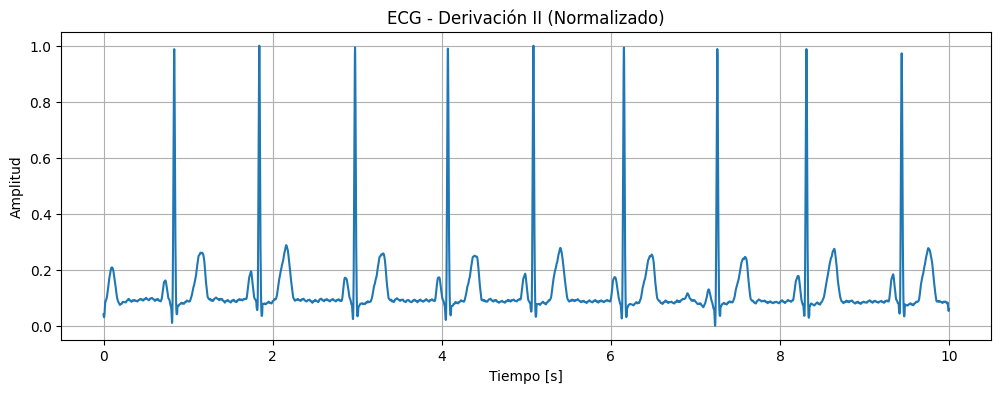

In [ ]:
# datos normalizados
plt.figure(figsize=(12, 4))
plt.plot(tiempo, datos_ecg_comprimidos)
plt.title("ECG - Derivación II (Normalizado)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Como se peude observar la compression causa un pequeño offset por lo tanto se vuelve a aplicar detrend a los datos comprimidos

In [ ]:
# Eliminacion offset por compression
señalSin_offset = detrend(datos_ecg_comprimidos)

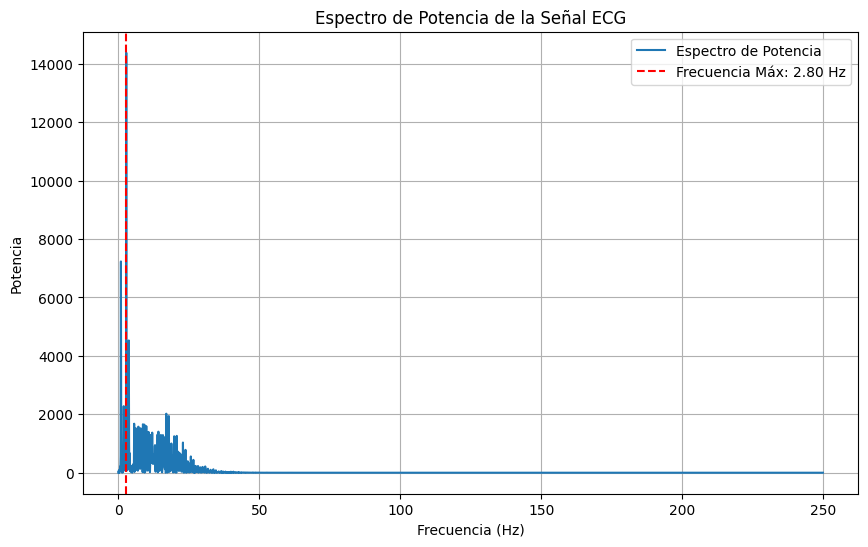

La frecuencia con máxima potencia es: 2.80 Hz


In [ ]:
# Uso de la función para verificación con el ejemplo que estamos siguiendo solo con una muestra
frecuencia_maxima = extraer_frecuencia_max_potencia(señalSin_offset, 500)  # Suponiendo fs = 500 Hz
print(f"La frecuencia con máxima potencia es: {frecuencia_maxima:.2f} Hz")

## **5. Para cada señal sumar el número de frecuencias que son significativas para bicoherencia (cuales tienen un valor superior a $\sqrt{ \frac{9.2}{2 \cdot N} }$)**

Se crea una funcion la cual realiza el calculo de la cantidad frecuencias que son significativas

In [ ]:
def contar_frecuencias_significativas(bicoherencia, N): #Donde bicoherencia es el array con valores calculada para cada frecuencia
                                                        #N es el numero de muestras de la señal
    # Calcular el umbral a partir de la fórmula dada
    umbral = np.sqrt(9.2 / (2 * N))

    # Contar cuántas frecuencias tienen bicoherencia superior al umbral
    num_significativas = np.sum(bicoherencia > umbral)

    return num_significativas, umbral

## **6.Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP) y suma de frecuencias significativas en bicoherencia (sFSB):**

En primer lugar, se realiza la rutina para los registros AFIB

In [ ]:
def analizar_senales(datos_ecg, estado, segment_size=500, fs=500):
    resultados_bicoherencia = []  # Lista para almacenar los resultados de cada archivo

    for archivo, ecg_signal in datos_ecg.items():
        # Aplicar detrend y normalización
        detrended_signal = detrend(ecg_signal)
        x_min = np.min(detrended_signal)
        x_max = np.max(detrended_signal)
        normalized_signal = normalize_ecg(detrended_signal, x_min, x_max)
        processed_signal = detrend(normalized_signal)

        # Bicoherencia a la señal
        bicoherencia_result = bicoherence(processed_signal, segment_size, fs)

        # Se cuentan las frecuencias significativas
        N = len(ecg_signal) // segment_size  # Número de muestras en la señal
        num_significativas, umbral = contar_frecuencias_significativas(bicoherencia_result, N)

        # Frecuencia de máxima potencia
        fmp = extraer_frecuencia_max_potenciaDTF(processed_signal, fs)

        # Se almacenan los resultados para este archivo en la lista
        resultados_bicoherencia.append([archivo, estado, fmp, num_significativas])

    # DataFrame con los resultados
    df_resultados = pd.DataFrame(resultados_bicoherencia, columns=['Registro', 'Estado', 'fMP(Hz)', 'sFSB'])

    return df_resultados

df_resultados_afib = analizar_senales(datos_ecg_afib, 'AFIB')
df_resultados_afib

<ipython-input-22-e2687a9a449b>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoherencia_numerator[f1, f2] += bispec


,Registro,Estado,fMP(Hz),sFSB
0,MUSE_20180120_121001_43000.csv,AFIB,2.5,31
1,MUSE_20180113_183723_26000.csv,AFIB,4.0,89
2,MUSE_20180113_122318_73000.csv,AFIB,4.9,93
3,MUSE_20180116_133517_43000.csv,AFIB,5.1,51
4,MUSE_20180114_070940_66000.csv,AFIB,1.3,75
...,...,...,...,...
1775,MUSE_20180113_135629_97000.csv,AFIB,3.3,15
1776,MUSE_20180120_122334_05000.csv,AFIB,9.0,89
1777,MUSE_20180115_120802_12000.csv,AFIB,4.9,12
1778,MUSE_20180113_182534_08000.csv,AFIB,1.1,32


Ahora se realiza la rutina para los registros SB

In [ ]:
df_resultados_sb = analizar_senales(datos_ecg_sb_dict, 'SB')
df_resultados_sb

<ipython-input-22-e2687a9a449b>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  bicoherencia_numerator[f1, f2] += bispec


,Registro,Estado,fMP(Hz),sFSB
0,MUSE_20180116_131029_02000.csv,SB,2.8,66
1,MUSE_20180116_175255_75000.csv,SB,0.9,50
2,MUSE_20180113_073756_28000.csv,SB,0.8,64
3,MUSE_20180113_134942_37000.csv,SB,1.0,58
4,MUSE_20180116_125842_09000.csv,SB,3.8,90
...,...,...,...,...
3884,MUSE_20180114_134103_72000.csv,SB,1.0,90
3885,MUSE_20180112_120724_15000.csv,SB,2.9,60
3886,MUSE_20180113_125842_49000.csv,SB,0.9,43
3887,MUSE_20180114_133937_98000.csv,SB,2.9,57


Ahora se crea un dataframe que contiene los registros de ambas condiciones (AFIB y SB)

In [ ]:
# Se concatenan dataframes df_resultados_afib y df_resultados_sb
df_resultados_combinados = pd.concat([df_resultados_afib, df_resultados_sb], ignore_index=True)

df_resultados_combinados

,Registro,Estado,fMP(Hz),sFSB
0,MUSE_20180120_121001_43000.csv,AFIB,2.5,31
1,MUSE_20180113_183723_26000.csv,AFIB,4.0,89
2,MUSE_20180113_122318_73000.csv,AFIB,4.9,93
3,MUSE_20180116_133517_43000.csv,AFIB,5.1,51
4,MUSE_20180114_070940_66000.csv,AFIB,1.3,75
...,...,...,...,...
5664,MUSE_20180114_134103_72000.csv,SB,1.0,90
5665,MUSE_20180112_120724_15000.csv,SB,2.9,60
5666,MUSE_20180113_125842_49000.csv,SB,0.9,43
5667,MUSE_20180114_133937_98000.csv,SB,2.9,57


## **7. Para las señales de análisis del punto 2 aplicar las rutinas del punto 3 al 5 y hacer un informe que permita evidenciar las diferencias entre las señales SB y AFIB utilizando las herramientas de estadística descriptiva**

## **Analisis de estadistica descriptiva**

Se decidio realizar un boxplot para analizar las variables fMP y sFSB en las condiciones AFIB y SB, ya que permite visualizar de manera clara la distribución de los datos, la mediana, los cuartiles y los valores atípicos. Es útil en este contexto porque facilita la comparación directa entre ambos grupos, identifica outliers y muestra la variabilidad y el sesgo de las señales ECG en cada condición. Esto es especialmente relevante para evaluar diferencias en la complejidad y regularidad de las señales de la derivación II, lo cual es clave en el análisis de enfermedades cardíacas como la fibrilación auricular y la bradicardia sinusal.

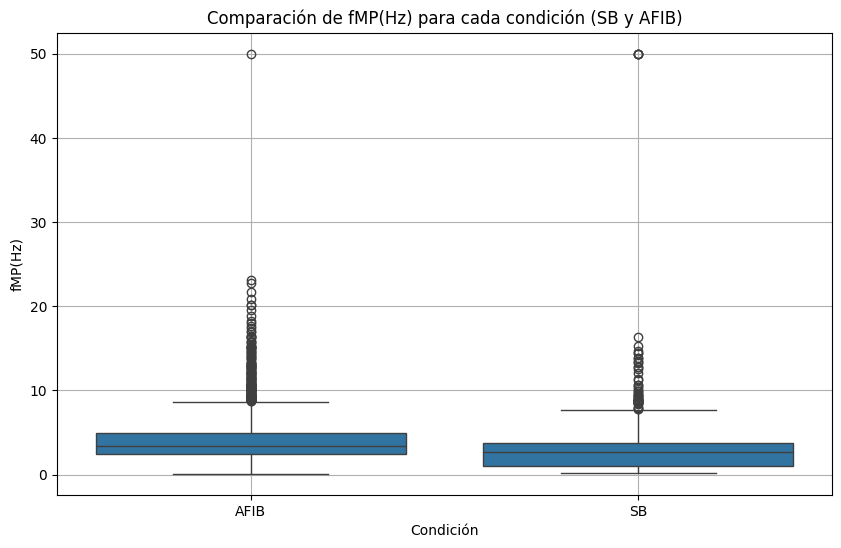

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Estado', y='fMP(Hz)', data=df_resultados_combinados)
plt.title('Comparación de fMP(Hz) para cada condición (SB y AFIB)')
plt.xlabel('Condición')
plt.ylabel('fMP(Hz)')
plt.grid(True)
plt.show()

En el caso de la fibrilación auricular (AFIB), el boxplot muestra una mayor variabilidad en los valores de fMP, con la presencia de numerosos outliers que alcanzan frecuencias relativamente altas (por encima de 20 Hz e incluso cercanas a 50 Hz). Esto es consistente con la fisiología de la AFIB, ya que esta condición se caracteriza por una actividad eléctrica caótica y desorganizada en las aurículas del corazón, lo que genera una amplia gama de frecuencias de activación, reflejándose en una distribución de fMP más dispersa. La fibrilación auricular produce un patrón irregular en el ECG, lo que explicaría tanto la amplitud de la caja en el boxplot como la presencia de muchos valores atípicos [5].

Por otro lado, en la bradicardia sinusal (SB), si bien se observa cierta variabilidad, se puede ver que es menor en comparacion con la fibrilacion auricular, con la mayoría de los datos agrupados cerca de valores bajos (alrededor de 1-3 Hz). En esta condición, el ritmo cardíaco es anormalmente lento, pero organizado, lo que se refleja en un ECG más regular y frecuencias más consistentes [6]. La bradicardia sinusal está asociada con un ritmo de activación que proviene del nodo sinusal de manera controlada, lo que explica por qué el boxplot tiene una caja más compacta y presenta menos outliers, ya que la señal ECG no tiene grandes fluctuaciones en la frecuencia.

Ambas condiciones muestran diferencias claras en el comportamiento de fMP, lo que sugiere que los patrones de activación eléctrica cardíaca, captados por la derivación II, son significativamente diferentes. La derivación II del ECG, que registra la actividad eléctrica entre el brazo derecho y la pierna izquierda, es conocida por capturar de manera efectiva los ritmos cardíacos básicos, especialmente aquellos que provienen de los nodos principales del corazón [7]. Esto explica por qué las señales de AFIB y SB son tan distintas en esta derivación, pues en AFIB hay múltiples focos de activación auricular desorganizada, mientras que en SB la actividad se mantiene en el nodo sinusal, reflejando un patrón más regular.

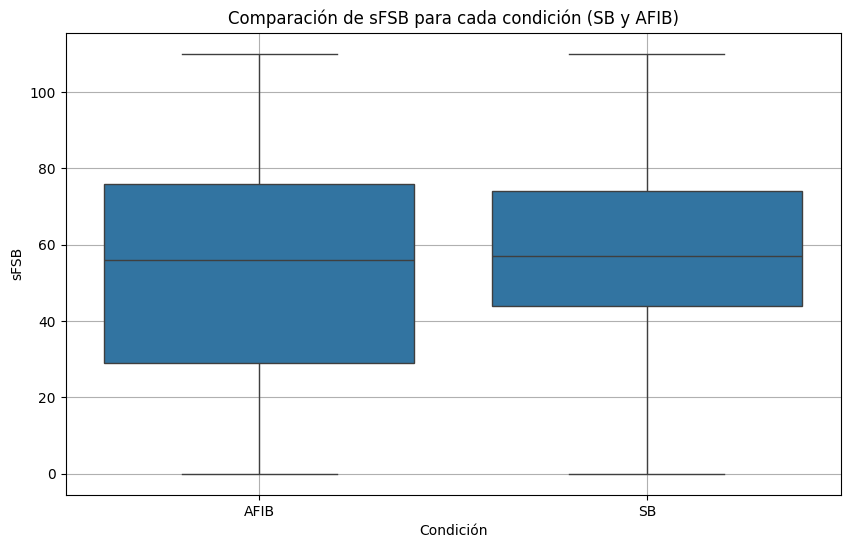

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estado', y='sFSB', data=df_resultados_combinados)
plt.title('Comparación de sFSB para cada condición (SB y AFIB)')
plt.xlabel('Condición')
plt.ylabel('sFSB')
plt.grid(True)
plt.show()

La bicoherencia es una herramienta que permite detectar acoplamientos de fase entre diferentes componentes de frecuencia de una señal no lineal, como las señales de ECG [1]. En este contexto, las frecuencias significativas para bicoherencia (sFSB) nos indican cuántas frecuencias presentan una relación cuadrática de fase con otras, lo cual puede estar vinculado a la complejidad de las dinámicas cardíacas en condiciones normales y patológicas.

En el caso de la fibrilación auricular (AFIB), el boxplot muestra una mayor dispersión en los valores de sFSB, con un rango amplio que se extiende hasta valores más altos en comparación con la bradicardia sinusal (SB). Este comportamiento es consistente con la fisiología de AFIB, donde múltiples focos de activación caótica y desorganizada en las aurículas producen una mayor complejidad en la señal ECG. La derivación II, que captura principalmente la actividad eléctrica del eje cardíaco principal, detecta la desorganización de las ondas P durante la AFIB, lo que resulta en una señal con más componentes de frecuencia significativamente acoplados en fase [5]. Esto se refleja en una mayor cantidad de frecuencias con bicoherencia significativa en el rango medio-alto.

Por otro lado, en la bradicardia sinusal (SB), el rango de sFSB es más estrecho y los valores tienden a ser menores en comparación con AFIB. En esta condición, el ritmo cardíaco es más lento pero regular, y la activación eléctrica proviene principalmente del nodo sinusal, lo que genera un patrón más controlado y menos complejo en el ECG [6]. Dado que el proceso de polarización y despolarización ocurre de manera más ordenada en SB, la señal captada por la derivación II presenta menos frecuencias con bicoherencia significativa, lo que sugiere que hay menos interacción no lineal entre las distintas componentes de frecuencia.

De esta manera, se pueden identificar patrones de acoplamiento de fase que no son evidentes a través de métodos lineales como el análisis de espectro de potencia. En este contexto, la mayor cantidad de frecuencias con bicoherencia significativa en AFIB indica una mayor complejidad y desorganización en la dinámica cardíaca, mientras que los menores valores en SB reflejan la regularidad y simplicidad del ritmo cardíaco en esta condición.

## **8. Indicar si hay o no diferencias estadísticas entre las características espectrales para las dos poblaciones de estudio**

### Planteamiento de hipotesis nula (H0) y alternativa (H1)

Para determinar si existen diferencias estadísticas entre las poblaciones de estudio (AFIB y SB) en las variables fMP y sFSB, se realizarán pruebas para evualuar los supuestos de normalidad, homocedasticidad e independencia. A continuacion se especifican las hipotesis nulas (H0) y las hipotesis alternativas (H1) para cada supuesto.

**Para Normalidad:**

H0: Los datos provienen de una distribucion normal.

H1: Los datos no provienen de una distribucion normal.

**Para Homocedasticidad:**

H0: La varianza entre los grupos es constante (hay homocedasticidad).

H1: La varianza entre los grupos no es constante (hay heterocedasticidad).

**Supuesto de independencia:** Se da por aceptado en este contexto, ya que los registros del estudio provienen de diferentes poblaciones, es decir, individuos con diferentes enfermedades cardiacas. Esto implica que no hay influencia entre los grupos, lo que asegura que los datos sean independientes entre sí.

## **Seleccion del tipo de prueba**

Para comprobar el supuesto de normalidad, se utilizará la prueba de **Kolmogorov-Smirnov**. Esta prueba es adecuada dado el tamaño de los grupos poblacionales: **1780** registros para AFIB y **3889** para SB. La prueba de Kolmogorov-Smirnov es preferida en este caso porque, al tener muestras grandes, ofrece una evaluación robusta de si los datos siguen una distribución normal.

Por otro lado, para verificar el supuesto de homocedasticidad, se empleará la prueba de **Levene**. Esta prueba es especialmente versátil porque no asume normalidad en los datos y es efectiva en la evaluación de la igualdad de varianzas entre los grupos, independientemente de la forma de sus distribuciones.

**NORMALIDAD DE fMP PARA AFIB Y SB**

In [ ]:
from scipy.stats import kstest

fmp_afib = df_resultados_afib['fMP(Hz)']
fmp_sb = df_resultados_sb['fMP(Hz)']

alpha = 0.05  # Nivel de significancia

# Prueba de Kolmogorov-Smirnov para fMP de AFIB
ks_stat_afib, p_value_afib = kstest(fmp_afib, 'norm', args=(fmp_afib.mean(), fmp_afib.std()))

# Resultados para AFIB
print(f"Estadístico KS para AFIB: {ks_stat_afib}")
print(f"Valor p para AFIB: {p_value_afib}")

# Se verifica si se rechaza la hipótesis nula para AFIB
if p_value_afib < alpha:
    print("Se rechaza la hipótesis nula para AFIB: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula para AFIB: Los datos siguen una distribución normal.")

# Prueba de Kolmogorov-Smirnov para fMP de SB
ks_stat_sb, p_value_sb = kstest(fmp_sb, 'norm', args=(fmp_sb.mean(), fmp_sb.std()))

# Resultados para SB
print(f"Estadístico KS para SB: {ks_stat_sb}")
print(f"Valor p para SB: {p_value_sb}")

# Se verifica si se rechaza la hipótesis nula para SB
if p_value_sb < alpha:
    print("Se rechaza la hipótesis nula para SB: Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula para SB: Los datos siguen una distribución normal.")


Estadístico KS para AFIB: 0.18470054577078188
Valor p para AFIB: 1.2667389525933712e-53
Se rechaza la hipótesis nula para AFIB: Los datos no siguen una distribución normal.
Estadístico KS para SB: 0.20380633479154228
Valor p para SB: 4.122076424906376e-142
Se rechaza la hipótesis nula para SB: Los datos no siguen una distribución normal.


Los resultados de la prueba de Kolmogorov-Smirnov muestran que, tanto para el grupo de AFIB como para el grupo de SB, los datos no siguen una distribución normal. Esto se concluye porque los valores p obtenidos para ambos grupos son extremadamente pequeños, muy por debajo del umbral típico de significancia (α = 0.05). Además, los estadísticos KS para AFIB (0.185) y SB (0.204) indican desviaciones significativas respecto a la normalidad.

Por lo tanto, se rechaza la hipótesis nula de normalidad para ambos grupos, lo que sugiere que los datos no son normalmente distribuidos. Dado este resultado, será necesario considerar **pruebas no paramétricas** para realizar el análisis estadístico de las diferencias entre las poblaciones.

**NORMALIDAD DE sFSB PARA AFIB Y SB**

In [ ]:
sfsb_afib = df_resultados_afib['sFSB']
sfsb_sb = df_resultados_sb['sFSB']

# Prueba de Kolmogorov-Smirnov para sFSB de AFIB
ks_stat_afib_sfsb, p_value_afib_sfsb = kstest(sfsb_afib, 'norm', args=(sfsb_afib.mean(), sfsb_afib.std()))

# Resultados para AFIB
print(f"Estadístico KS para AFIB (sFSB): {ks_stat_afib_sfsb}")
print(f"Valor p para AFIB (sFSB): {p_value_afib_sfsb}")

# Se verifica si se rechaza la hipótesis nula para AFIB
if p_value_afib_sfsb < alpha:
    print("Se rechaza la hipótesis nula para AFIB (sFSB): Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula para AFIB (sFSB): Los datos siguen una distribución normal.")

# Prueba de Kolmogorov-Smirnov para sFSB de SB
ks_stat_sb_sfsb, p_value_sb_sfsb = kstest(sfsb_sb, 'norm', args=(sfsb_sb.mean(), sfsb_sb.std()))

# Resultados para SB
print(f"Estadístico KS para SB (sFSB): {ks_stat_sb_sfsb}")
print(f"Valor p para SB (sFSB): {p_value_sb_sfsb}")

# Se verifica si se rechaza la hipótesis nula para SB
if p_value_sb_sfsb < alpha:
    print("Se rechaza la hipótesis nula para SB (sFSB): Los datos no siguen una distribución normal.")
else:
    print("No se rechaza la hipótesis nula para SB (sFSB): Los datos siguen una distribución normal.")

Estadístico KS para AFIB (sFSB): 0.08265723703754868
Valor p para AFIB (sFSB): 5.0010485003415105e-11
Se rechaza la hipótesis nula para AFIB (sFSB): Los datos no siguen una distribución normal.
Estadístico KS para SB (sFSB): 0.05716680508021599
Valor p para SB (sFSB): 1.729016989155552e-11
Se rechaza la hipótesis nula para SB (sFSB): Los datos no siguen una distribución normal.


Los resultados de la prueba de Kolmogorov-Smirnov para la variable sFSB indican que, al igual que con los datos de fMP, los datos de sFSB tampoco siguen una distribución normal en ambos grupos (AFIB y SB). Los valores p para ambos casos son extremadamente pequeños, lo que lleva a rechazar la hipótesis nula de normalidad. Los estadísticos KS para AFIB (0.083) y SB (0.057) también reflejan desviaciones respecto a la normalidad, aunque algo menores en comparación con los resultados de fMP.

Dado que los datos de sFSB no siguen una distribución normal, esto refuerza la necesidad de emplear pruebas **no paramétricas** para el análisis de las diferencias entre los grupos AFIB y SB en cuanto a sFSB.

**HOMOCEDASTICIDAD DE fMP PARA AFIB Y SB**

In [ ]:
from scipy.stats import levene

# Datos de fMP para AFIB y SB
fmp_afib = df_resultados_combinados[df_resultados_combinados['Estado'] == 'AFIB']['fMP(Hz)']
fmp_sb = df_resultados_combinados[df_resultados_combinados['Estado'] == 'SB']['fMP(Hz)']

# Prueba de Levene
stat, p_value = levene(fmp_afib, fmp_sb)

print(f"Estadístico de Levene: {stat}")
print(f"Valor p: {p_value}")

# Verificar si se rechaza la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Las varianzas no son iguales (hay heterocedasticidad).")
else:
    print("No se rechaza la hipótesis nula: Las varianzas son iguales (hay homocedasticidad).")

Estadístico de Levene: 88.3579468391602
Valor p: 7.739821139304445e-21
Se rechaza la hipótesis nula: Las varianzas no son iguales (hay heterocedasticidad).


Los resultados de la prueba de Levene indican que las varianzas entre los grupos AFIB y SB no son homogéneas, es decir, hay heterocedasticidad. El valor p obtenido es extremadamente bajo, lo que nos lleva a rechazar la hipótesis nula de que las varianzas entre los grupos son iguales. El estadístico de Levene (88.36) también respalda esta conclusión, mostrando una diferencia considerable en la dispersión de los datos entre los grupos.

## **Seleccion de prueba Parametrica o No Parametrica**

Dado que los resultados de las pruebas de normalidad y homocedasticidad indicaron que los datos no siguen una distribución normal y presentan varianzas desiguales entre los grupos, se decide utilizar una **prueba no paramétrica** para comparar las poblaciones AFIB y SB. La prueba **U de Mann-Whitney** es la más adecuada en este caso, ya que no requiere que los datos cumplan con los supuestos de normalidad o homogeneidad de varianzas [8]. Esta prueba permite evaluar si existen diferencias estadísticamente significativas entre las dos poblaciones en las variables fMP y sFSB, comparando las distribuciones de ambos grupos sin asumir una forma específica de las mismas. Esto la convierte en una opción robusta y apropiada para el análisis de este estudio, dado que los grupos presentan características fisiológicas distintas.

**Se plantean las hipotesis para la prueba U de Mann-Whitney:**

H0: No hay diferencias estadisticas significativas en las distribuciones de las dos poblaciones (Medianas iguales)

H1: Existen diferencias estadisticas significativas en las distribuciones de las dos poblaciones (Medianas diferentes)

**SE REALIZA LA PRUEBA PARA LA VARIABLE fMP**

In [ ]:
from scipy.stats import mannwhitneyu

# Datos de fMP para AFIB y SB
fmp_afib = df_resultados_combinados[df_resultados_combinados['Estado'] == 'AFIB']['fMP(Hz)']
fmp_sb = df_resultados_combinados[df_resultados_combinados['Estado'] == 'SB']['fMP(Hz)']

# Prueba U de Mann-Whitney
u_stat, p_value = mannwhitneyu(fmp_afib, fmp_sb, alternative='two-sided')

print(f"Estadístico U: {u_stat}")
print(f"Valor p: {p_value}")

# Verificar si se rechaza la hipótesis nula
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Existen diferencias estadísticas significativas entre los dos estados para la variable fMP.")
else:
    print("No se rechaza la hipótesis nula: No existen diferencias estadísticas significativas entre los dos estados para la variable fMP.")

Estadístico U: 4781388.5
Valor p: 2.8670168849961355e-118
Se rechaza la hipótesis nula: Existen diferencias estadísticas significativas entre los dos estados para la variable fMP.


Los resultados de la prueba U de Mann-Whitney para la variable fMP muestran que el estadístico U es 4781388.5 y el valor p es extremadamente bajo, muy por debajo del nivel de significancia ( α = 0.05). Esto indica que se rechaza la hipótesis nula, lo que significa que existen diferencias estadísticas significativas entre las poblaciones de AFIB y SB en cuanto a la frecuencia con máxima potencia (fMP).

Este resultado sugiere que la distribución de fMP difiere significativamente entre las dos condiciones, lo cual es consistente con la fisiología subyacente, ya que la fibrilación auricular y la bradicardia sinusal representan ritmos cardíacos muy distintos en términos de su dinámica eléctrica.

**SE REALIZA LA PRUEBA PARA LA VARIABLE sFSB**

In [ ]:
# Datos de sFSB para AFIB y SB
sfsb_afib = df_resultados_combinados[df_resultados_combinados['Estado'] == 'AFIB']['sFSB']
sfsb_sb = df_resultados_combinados[df_resultados_combinados['Estado'] == 'SB']['sFSB']

# Prueba U de Mann-Whitney
u_stat_sfsb, p_value_sfsb = mannwhitneyu(sfsb_afib, sfsb_sb, alternative='two-sided')

print(f"Estadístico U: {u_stat_sfsb}")
print(f"Valor p: {p_value_sfsb}")

# Verificar si se rechaza la hipótesis nula
if p_value_sfsb < alpha:
    print("Se rechaza la hipótesis nula: Existen diferencias estadísticas significativas entre los dos estados para la variable sFSB.")
else:
    print("No se rechaza la hipótesis nula: No existen diferencias estadísticas significativas entre los dos estados para la variable sFSB.")

Estadístico U: 3089928.0
Valor p: 8.442969358121434e-11
Se rechaza la hipótesis nula: Existen diferencias estadísticas significativas entre los dos estados para la variable sFSB.


Los resultados de la prueba U de Mann-Whitney para la variable sFSB muestran un estadístico U de 3089928.0 y un valor p muy bajo, lo que nuevamente está muy por debajo del nivel de significancia (α = 0.05). Esto indica que se rechaza la hipótesis nula, concluyendo que existen diferencias estadísticas significativas entre los grupos AFIB y SB en cuanto a la suma de frecuencias significativas para bicoherencia (sFSB).

Este hallazgo es coherente con la diferencia en la complejidad de las señales ECG para estas dos condiciones. En particular, la fibrilación auricular (AFIB) suele mostrar una mayor irregularidad en las interacciones entre las diferentes frecuencias, mientras que la bradicardia sinusal (SB) tiende a ser más regular, lo que explica las diferencias en sFSB observadas entre los dos grupos [5, 6].

# **Conclusiones**

Los resultados de las pruebas de normalidad (Kolmogorov-Smirnov) y homocedasticidad (Levene) mostraron que los datos no seguían una distribución normal ni tenían varianzas homogéneas, lo cual fue consistente con la naturaleza no lineal y compleja de las señales ECG. Posteriormente, la prueba U de Mann-Whitney reveló diferencias estadísticamente significativas en ambas variables (fMP y sFSB) entre las poblaciones de AFIB y SB. Esto confirma que las señales ECG, captadas principalmente desde la derivación II, presentan comportamientos marcadamente distintos entre estas dos condiciones cardíacas.

La fibrilación auricular, como era de esperarse dada su fisiología, mostró mayor variabilidad en la frecuencia con máxima potencia, reflejando la desorganización y complejidad en la actividad eléctrica del corazón [5]. La bradicardia sinusal, por otro lado, se caracterizó por una mayor consistencia en las frecuencias, reflejando el ritmo más lento pero regular del corazón en esta condición [6]. Igualmente, la mayor cantidad de frecuencias con bicoherencia significativa en AFIB refuerza la idea de que la fibrilación auricular involucra interacciones no lineales más complejas entre las frecuencias del ECG en comparación con la bradicardia sinusal.

En comparación con el estudio original [1], que también utiliza análisis de bicoherencia para detectar patrones no lineales en señales ECG, los resultados de este análisis son consistentes. Tanto en nuestro estudio, como en el original se destaca la importancia de la bicoherencia para identificar fases acopladas y dinámicas no lineales en el corazón, y ambos concluyen que la fibrilación auricular tiene una mayor dispersión de frecuencias y una pérdida de acoplamientos de fase que son marcadores claros de una condición patológica. La adición de la compresión y el detrend en los datos de este estudio fue fundamental para obtener resultados más claros y consistentes, como también se destacó en el trabajo original [1]​.

# **Referencias**

* [1] Kotriwar, Y., Kachhara, S., Harikrishnan, K. P., & Ambika, G. (2018). Higher order spectral analysis of ECG signals. arXiv preprint arXiv:1809.08451.
* [2]Gadaleta, M., Harrington, P., Barnhill, E., Hytopoulos, E., Turakhia, M. P., Steinhubl, S. R., & Quer, G. (2023). Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias. Npj Digital Medicine, 6(1), 1–9. https://doi.org/10.1038/s41746-023-00966-w
* [3]Zheng, J., Chu, H., Struppa, D., Zhang, J., Yacoub, S. M., El-Askary, H., Chang, A., Ehwerhemuepha, L., Abudayyeh, I., Barrett, A., Fu, G., Yao, H., Li, D., Guo, H., & Rakovski, C. (2020). Optimal multi-stage arrhythmia classification approach. Scientific Reports, 10(1), 1–17. https://doi.org/10.1038/s41598-020-59821-7
* [4] Liu, L.-R., Huang, M.-Y., Huang, S.-T., Kung, L.-C., Lee, C.-H., Yao, W.-T., Tsai, M.-F., Hsu, C.-H., Chu, Y.-C., Hung, F.-H., & Chiu, H.-W. (2024). An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection. Heliyon, 10(5), e27200. https://doi.org/10.1016/j.heliyon.2024.e27200

* [5] Pava-Molano, L. F., & Perafán-Bautista, P. E. (2016). Generalidades de la fibrilación auricular. Rev Colomb Cardiol, 23(Supl 5), 5-8.

* [6] Dighton, D. H. (1974). Sinus bradycardia. Autonomic influences and clinical assessment. British Heart Journal, 36(8), 791.

* [7] Davis, D. (2007). Interpretación del ECG. Su dominio rápido y exacto. Ed. Médica Panamericana.

* [8] IBM. "Tests Mann-Whitney U Test." *IBM SPSS Statistics Documentation*, IBM, 20 Oct. 2024, https://www.ibm.com/docs/es/spss-statistics/beta?topic=tests-mann-whitney-u-test.